#Music Genre Classification - small course project/Lab


In [ ]:
# Step 1: Load necessary libraries
# librosa, numpy, pandas, sklearn, etc.
import librosa
import numpy as np
import pandas as pd
import sklearn
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: Define a function to extract music features
# You may consider MFCC, Chroma STFT, Spectral Contrast, Zero Crossing Rate, Tempo, etc
# Be sure to have the feature dimension as large as possible, to get higher performance
# librosa.feature and librosa.beat may contain many useful functions
def extract_features(fname,file_dir):
  y, sr = librosa.load(file_dir)

  mfcc = librosa.feature.mfcc(y=y, sr=sr)
  mfcc_mean=np.mean(mfcc)
  mfcc_var=np.var(mfcc)

  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
  chroma_stft_mean=np.mean(chroma_stft)
  chroma_stft_var=np.var(chroma_stft)

  spectral_contrast = librosa.feature.spectral_contrast(S=np.abs(librosa.stft(y)), sr=sr)
  spectral_contrast_mean =np.mean(spectral_contrast)
  spectral_contrast_var=np.var(spectral_contrast)


  zero_crossing_rate=librosa.feature.zero_crossing_rate(y)
  zero_crossing_rate_mean=np.mean(zero_crossing_rate)
  zero_crossing_rate_var=np.var(zero_crossing_rate)

  tempo,beats=librosa.beat.beat_track(y=y, sr=sr)

  #new features
  chroma_cqt=librosa.feature.chroma_cqt(y=y, sr=sr)
  chroma_cqt_mean=np.mean(chroma_cqt)
  chroma_cqt_var=np.var(chroma_cqt)

  spectral_centroid=librosa.feature.spectral_centroid(y=y, sr=sr)
  spectral_centroid_mean=np.mean(spectral_centroid)
  spectral_centroid_var=np.var(spectral_centroid)

  rms=librosa.feature.rms(y=y)
  rms_mean=np.mean(rms)
  rms_var=np.var(rms)
  #for i in range(20):

  print(librosa.feature.mfcc(y=y, sr=sr)[0].shape) #0-19


  ret_list=[fname,mfcc_mean,mfcc_var,chroma_stft_mean,chroma_stft_var,spectral_contrast_mean,spectral_contrast_var,zero_crossing_rate_mean,zero_crossing_rate_var,tempo,chroma_cqt_mean,chroma_cqt_var,rms_mean,rms_var]

  return ret_list
def extract_mfcc(fname,file_dir):
  y, sr = librosa.load(file_dir)
  mfcc = librosa.feature.mfcc(y=y, sr=sr)
  ret_list=[]
  for i in range(20):
    ret_list.append(np.mean(mfcc[i]))
    ret_list.append(np.var(mfcc[i]))
  return ret_list


In [ ]:
# Step 3: Iterate through each genre folder and extract features for each song
# Remember to mount Google Drive before accessing the dataset
# Useful python funtions: os.listdir, pandas.DataFrame
styles=os.listdir("./drive/MyDrive/GTZAN/genres/")
dataset=["genres","images"]

#os.mkdir("./drive/MyDrive/extracted_features_AIST3110_Lab_7")
#result=pd.dataframe([],columns=["filename","mfcc_mean","mfcc_var","chroma_stft_mean","chroma_stft_var","spectral_contrast_mean","spectral_contrast_var","zero_crossing_rate_mean","zero_crossing_rate_var","tempo,chroma_cqt_mean","chroma_cqt_var","rms_mean","rms_var"])
features_list=[]
for i in range (1):
  len_styles=len(styles)
  for j in range(len_styles):
    print(styles[j])
    for files in (os.listdir("./drive/MyDrive/GTZAN/"+dataset[i]+"/"+styles[j]+"/")):
      dir="./drive/MyDrive/GTZAN/"+dataset[i]+"/"+styles[j]+"/"+files
      #print(files) #str
      if(dataset[i]=="genres"):
        feature_row=extract_mfcc(files,dir)
        features_list.append(feature_row)
        #print(features_list)

col_list=[]
for i in range(20):
    col_list.append("mean_mfcc"+str([i]))
    col_list.append("var_mfcc"+str([i]))
df=pd.DataFrame(features_list,columns=col_list)
df.to_csv("./drive/MyDrive/extracted_features_AIST3110_Lab_7/mfcc.csv")


blues
classical
country
disco
hiphop
metal
pop
reggae
rock
jazz


In [ ]:
#add mfcc features frame by frame to improve accuracy
styles=os.listdir("./drive/MyDrive/GTZAN/genres/")
dataset=["genres","images"]


features_list=[]
for i in range (1):
  len_styles=len(styles)
  for j in range(len_styles):
    print(styles[j])
    for files in (os.listdir("./drive/MyDrive/GTZAN/"+dataset[i]+"/"+styles[j]+"/")):
      dir="./drive/MyDrive/GTZAN/"+dataset[i]+"/"+styles[j]+"/"+files
      #print(files) #str
      if(dataset[i]=="genres"):
        feature_row=extract_features(files,dir)
        features_list.append(feature_row)
        #print(features_list)


df=pd.DataFrame(features_list,columns=["filename","mfcc_mean","mfcc_var","chroma_stft_mean","chroma_stft_var","spectral_contrast_mean","spectral_contrast_var","zero_crossing_rate_mean","zero_crossing_rate_var","tempo","chroma_cqt_mean","chroma_cqt_var","rms_mean","rms_var","mfcc"])
df.to_csv("./drive/MyDrive/extracted_features_AIST3110_Lab_7/features.csv")


In [ ]:
# Step 4: Split the dataset into training and testing sets
# sklearn.model_selection has useful train_test_split function
# Use test_size=0.2, random_state=42
# Remember to normalize features using one of the scalers in sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df=pd.read_csv("./drive/MyDrive/extracted_features_AIST3110_Lab_7/features.csv")
#train_test_split(test_size=0.2, random_state=42

fname_list=df['filename'].tolist()
genre_tag=[items[0:-10] for items in fname_list]
df=df.drop(columns=['filename'])
df=df.drop(columns=["Unnamed: 0"])

print(df)
df_temp=pd.read_csv("./drive/MyDrive/extracted_features_AIST3110_Lab_7/mfcc.csv")
result = pd.concat([df, df_temp], axis=1)
print(result)
result=result.drop(columns=["Unnamed: 0"])
result.to_csv("./drive/MyDrive/extracted_features_AIST3110_Lab_7/combined.csv")

X=result.to_numpy(dtype= float)


encoder= preprocessing.LabelEncoder()
y=encoder.fit_transform(genre_tag)

#normalize features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[0])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)
print(y_train.shape)


     mfcc_mean   mfcc_var  chroma_stft_mean  chroma_stft_var  \
0    -8.460349  2631.7998          0.308526         0.087843   
1    -7.859532  3572.0220          0.291426         0.093985   
2     1.936639  1767.5433          0.350129         0.088772   
3    -0.057255  3606.4392          0.340849         0.094976   
4    -7.101466  3047.7520          0.302522         0.087551   
..         ...        ...               ...              ...   
995  -1.379827  2524.9707          0.290969         0.095819   
996 -10.165450  9576.3300          0.224085         0.091022   
997  -6.185657  5898.6816          0.295943         0.096363   
998  -2.911151  3404.3070          0.327828         0.091114   
999   0.895715  1585.3896          0.278350         0.083777   

     spectral_contrast_mean  spectral_contrast_var  zero_crossing_rate_mean  \
0                 21.459618              63.033892                 0.101461   
1                 23.421150              49.579017                 0.0730

In [ ]:
# Step 5: Train and evaluate the model using sklearn
# You can replace RandomForestClassifier with other classifiers if needed
# classifier.fit trains the model
# classifier.predict make predictions
# sklearn has confusion_matrix, classification_report, accuracy_score, etc for evaluation
# Remember to save the extracted features for future

import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
classifier = RandomForestClassifier(n_estimators=1000, max_depth=100)
#try to increase accuracy but failed
#classifier = RandomForestClassifier(n_estimators=10000, max_depth=100)
#classifier = RandomForestClassifier(n_estimators=10000, max_depth=1000)
classifier.fit(X_train,y_train)


pickle.dump(classifier, open("./drive/MyDrive/extracted_features_AIST3110_Lab_7/trained_model_combined_mfcc.pickle", "wb"))
y_pred = classifier.predict(X_test)

# using metrics module for accuracy calculation
print("Accuuracy score(train): ", metrics.accuracy_score(y_train, classifier.predict(X_train)))
print("Accuuracy score: ", metrics.accuracy_score(y_test, y_pred))
print("confusion_matrix\n",metrics.confusion_matrix(y_test,y_pred))
print("classification_report\n",metrics.classification_report(y_test,y_pred,target_names =os.listdir("./drive/MyDrive/GTZAN/genres/")))


Accuuracy score(train):  0.99875
Accuuracy score:  0.675
confusion_matrix
 [[11  0  0  3  0  0  2  0  1  3]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  0 18  1  0  1  1  0  1  3]
 [ 0  0  0 10  4  0  0  4  2  1]
 [ 0  0  0  1  8  0  1  0  4  1]
 [ 0  2  0  0  0 18  0  0  1  0]
 [ 0  0  0  0  0  0 20  0  0  2]
 [ 1  1  2  0  2  1  0 18  0  0]
 [ 0  1  2  0  1  0  0  0  9  0]
 [ 1  0  5  0  0  0  3  3  1 10]]
classification_report
               precision    recall  f1-score   support

       blues       0.73      0.55      0.63        20
   classical       0.76      1.00      0.87        13
     country       0.67      0.67      0.67        27
       disco       0.67      0.48      0.56        21
      hiphop       0.53      0.53      0.53        15
       metal       0.90      0.86      0.88        21
         pop       0.74      0.91      0.82        22
      reggae       0.72      0.72      0.72        25
        rock       0.47      0.69      0.56        13
        jazz       0.50      0

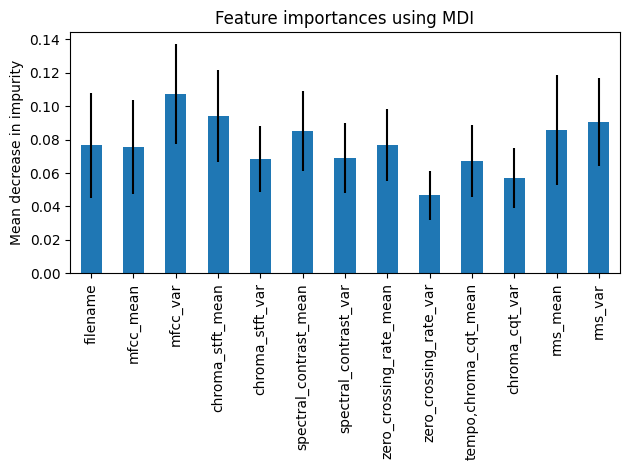

In [ ]:
# Step 6: Plot feature importance
# Get feature importance through classifier.feature_importances_
# Plot with matplotlib.pyplot library
import matplotlib.pyplot as plt


#referenced from scikitleatn website
feature_importance= pd.Series(classifier.feature_importances_, index=["filename","mfcc_mean","mfcc_var","chroma_stft_mean","chroma_stft_var","spectral_contrast_mean","spectral_contrast_var","zero_crossing_rate_mean","zero_crossing_rate_var","tempo,chroma_cqt_mean","chroma_cqt_var","rms_mean","rms_var"])

fig, ax = plt.subplots()
feature_importance.plot.bar(yerr=np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0), ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [ ]:
# Step 7: Retrieve similar songs and different songs
# IPython.display shows the song
# Remember to normalize your features!
# preprocessing.scale could be useful
import scipy.spatial.distance
import IPython.display as ipd
from sklearn import preprocessing
import librosa.display

def retrive_similar_or_different_songs(fname,file_dir,param="similar"):
  feature_list=extract_features(fname,file_dir)
  mfcc=extract_mfcc(fname,file_dir)
  feature_list=feature_list[1:]+mfcc


  norm_features = preprocessing.scale(feature_list)
  result_dist=[]
  file_dir=[]
  for i in range(1000):
    norm_x=preprocessing.scale(X[i])
    Y = scipy.spatial.distance.euclidean(norm_features, norm_x)
    result_dist.append(Y)
  df1=pd.read_csv("./drive/MyDrive/extracted_features_AIST3110_Lab_7/features_new_revised.csv")


  for i in range(5):
    min_index=result_dist.index(min(result_dist))
    max_index=result_dist.index(max(result_dist))
    index=max_index
    if(param=="similar"):
      index=min_index

    f_name=df1._get_value(index,"filename")
    dir="/content/drive/MyDrive/GTZAN/genres/"+f_name[0:-10]+"/"+f_name
    x, sr = librosa.load(dir)
    print(f_name)
    ipd.Audio(x, rate=sr)
    result_dist.pop(index)
    file_dir.append(dir)
  return file_dir

print("5 similar songs")
similar=retrive_similar_or_different_songs("Chopin.mp3","/content/drive/MyDrive/GTZAN/genres/classical/classical.00000.wav")
print("5 different songs")
different=retrive_similar_or_different_songs("Chopin.mp3","/content/drive/MyDrive/GTZAN/genres/classical/classical.00000.wav","different")


5 similar songs
(1293,)
classical.00000.wav
classical.00027.wav
jazz.00023.wav
classical.00066.wav
classical.00086.wav
5 different songs
(1293,)
reggae.00086.wav
hiphop.00038.wav
pop.00029.wav
pop.00085.wav
pop.00088.wav
